Accuracy: 0.0
Confusion Matrix:
 [[0 2]
 [0 0]]
Prediction for new input (Weight=155, Color Score=0.3): Orange


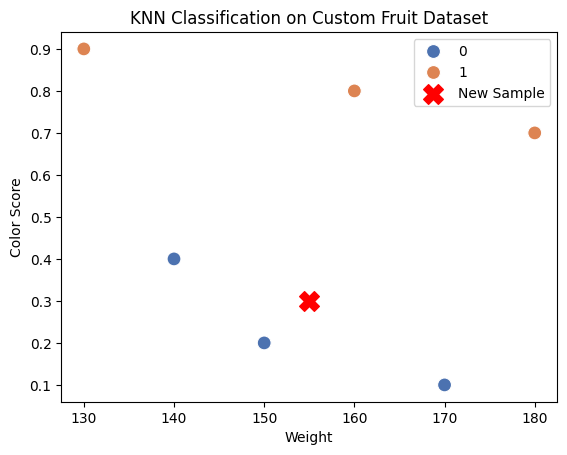

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Custom fruit dataset
data = {
    'Weight': [150, 170, 140, 130, 160, 180],
    'Color Score': [0.2, 0.1, 0.4, 0.9, 0.8, 0.7],
    'Label': ['Apple', 'Apple', 'Apple', 'Orange', 'Orange', 'Orange']
}

df = pd.DataFrame(data)

# Encode labels as numeric
df['Label'] = df['Label'].map({'Apple': 0, 'Orange': 1})

X = df[['Weight', 'Color Score']].values
y = df['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# New input sample to classify
new_sample = [[155, 0.3]]
predicted_label = knn.predict(new_sample)[0]

# Map numeric prediction back to label
label_map = {0: 'Apple', 1: 'Orange'}
print(f"Prediction for new input (Weight=155, Color Score=0.3): {label_map[predicted_label]}")

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=df['Label'], palette='deep', s=100)
plt.scatter(new_sample[0][0], new_sample[0][1], color='red', s=200, marker='X', label='New Sample')
plt.xlabel('Weight')
plt.ylabel('Color Score')
plt.title('KNN Classification on Custom Fruit Dataset')
plt.legend()
plt.show()
